In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


In [2]:
data = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


## EDA

Investigating First 60 columns 

In [4]:
df_60 = data[data.columns[:60]]
df_60.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Do you use any of the following hosted noteboo...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,NaN,Kaggle Notebooks


In [5]:
df_60.drop(0, axis=0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Age vs Duration

In [6]:
df_60['Duration (in seconds)'] = df_60['Duration (in seconds)'].astype('int')
mean_duration_per_age = df_60.groupby('Q2')['Duration (in seconds)'].agg('mean')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '18-21'),
  Text(1, 0, '22-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-69'),
  Text(10, 0, '70+')])

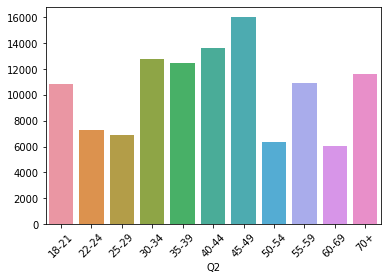

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x= mean_duration_per_age.index, y = mean_duration_per_age.values)
plt.xticks(rotation=45)

#### Gender vs Duration

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Man'),
  Text(1, 0, 'Nonbinary'),
  Text(2, 0, 'Prefer not to say'),
  Text(3, 0, 'Prefer to self-describe'),
  Text(4, 0, 'Woman')])

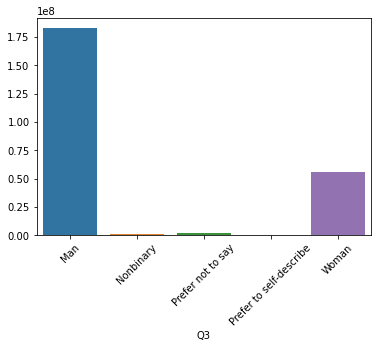

In [8]:
sum_duration_per_gender = df_60.groupby('Q3')['Duration (in seconds)'].agg('sum')
sns.barplot(x = sum_duration_per_gender.index, y = sum_duration_per_gender.values)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Man'),
  Text(1, 0, 'Nonbinary'),
  Text(2, 0, 'Prefer not to say'),
  Text(3, 0, 'Prefer to self-describe'),
  Text(4, 0, 'Woman')])

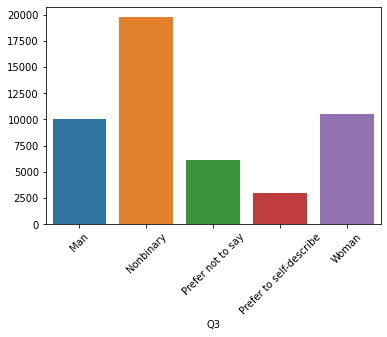

In [9]:
mean_duration_per_gender = df_60.groupby('Q3')['Duration (in seconds)'].agg('mean')
sns.barplot(x = mean_duration_per_gender.index, y = mean_duration_per_gender.values)
plt.xticks(rotation=45)

#### Country vs Duration

In [10]:
df_60['Q4'].value_counts()

India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Spain                   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Bangladesh'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Cameroon'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Chile'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'Czech Republic'),
  Text(12, 0, 'Ecuador'),
  Text(13, 0, 'Egypt'),
  Text(14, 0, 'Ethiopia'),
  Text(15, 0, 'France'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Ghana'),
  Text(18, 0, 'Hong Kong (S.A.R.)'),
  Text(19, 0, 'I do not wish to disclose my location'),
  Text(20, 0, 'India'),
  Text(21, 0, 'Indonesia'),
  Text(22, 0, 'Iran, Islamic Republic of...'),
  Text(23, 0, 'Ireland'),
  Text(24, 0, 'Israel'),
  Text(25, 0, 'Italy'),
  T

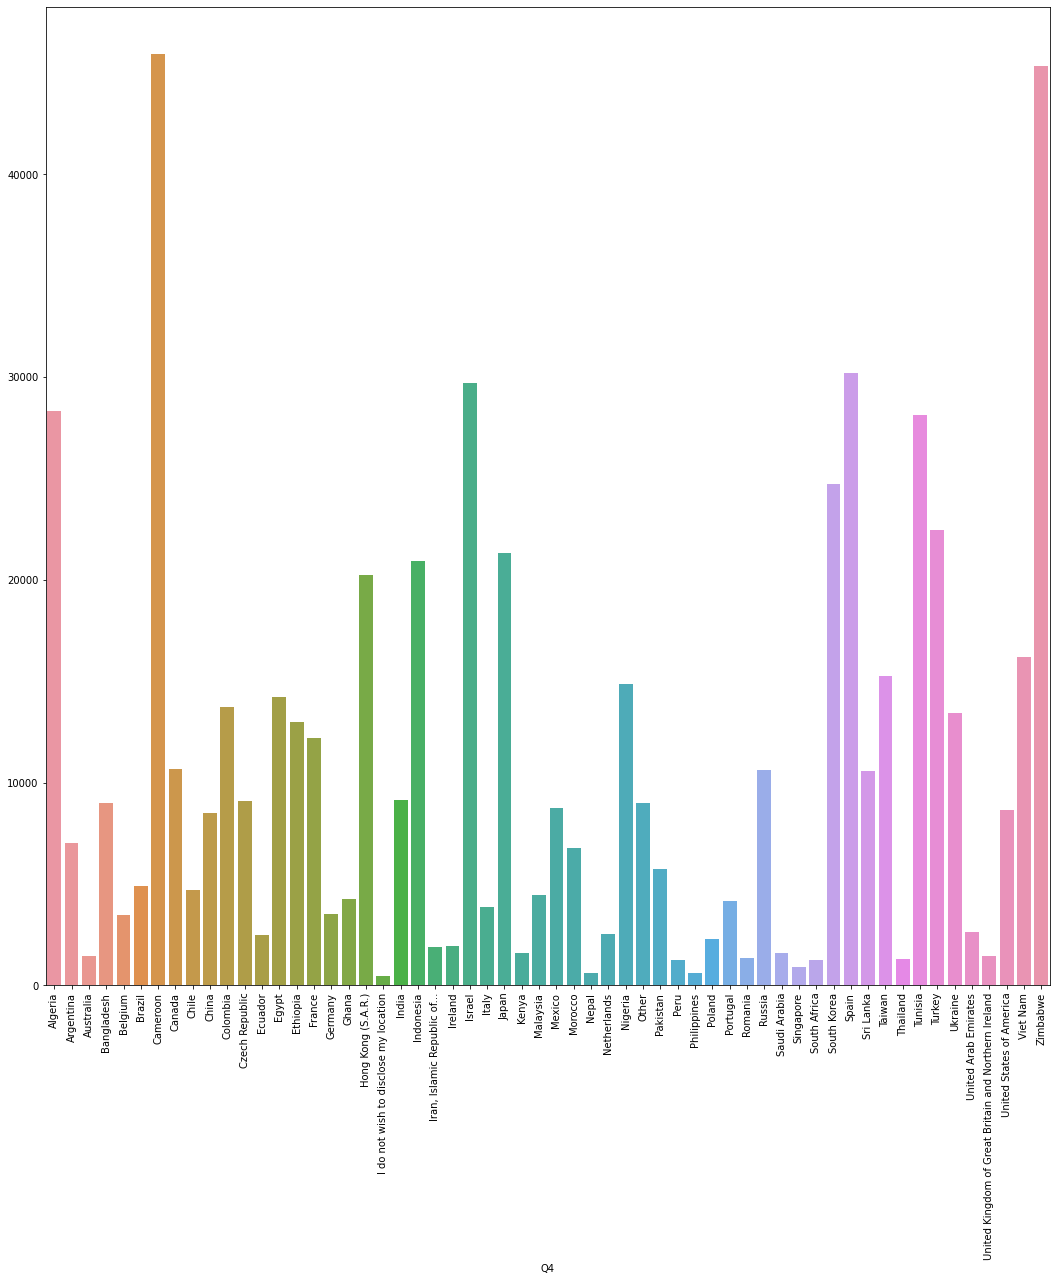

In [11]:
mean_duration_per_country = df_60.groupby('Q4')['Duration (in seconds)'].agg('mean')
plt.figure(figsize=(18,18))
sns.barplot(x = mean_duration_per_country.index, y = mean_duration_per_country.values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Bangladesh'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Cameroon'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Chile'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'Czech Republic'),
  Text(12, 0, 'Ecuador'),
  Text(13, 0, 'Egypt'),
  Text(14, 0, 'Ethiopia'),
  Text(15, 0, 'France'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Ghana'),
  Text(18, 0, 'Hong Kong (S.A.R.)'),
  Text(19, 0, 'I do not wish to disclose my location'),
  Text(20, 0, 'India'),
  Text(21, 0, 'Indonesia'),
  Text(22, 0, 'Iran, Islamic Republic of...'),
  Text(23, 0, 'Ireland'),
  Text(24, 0, 'Israel'),
  Text(25, 0, 'Italy'),
  T

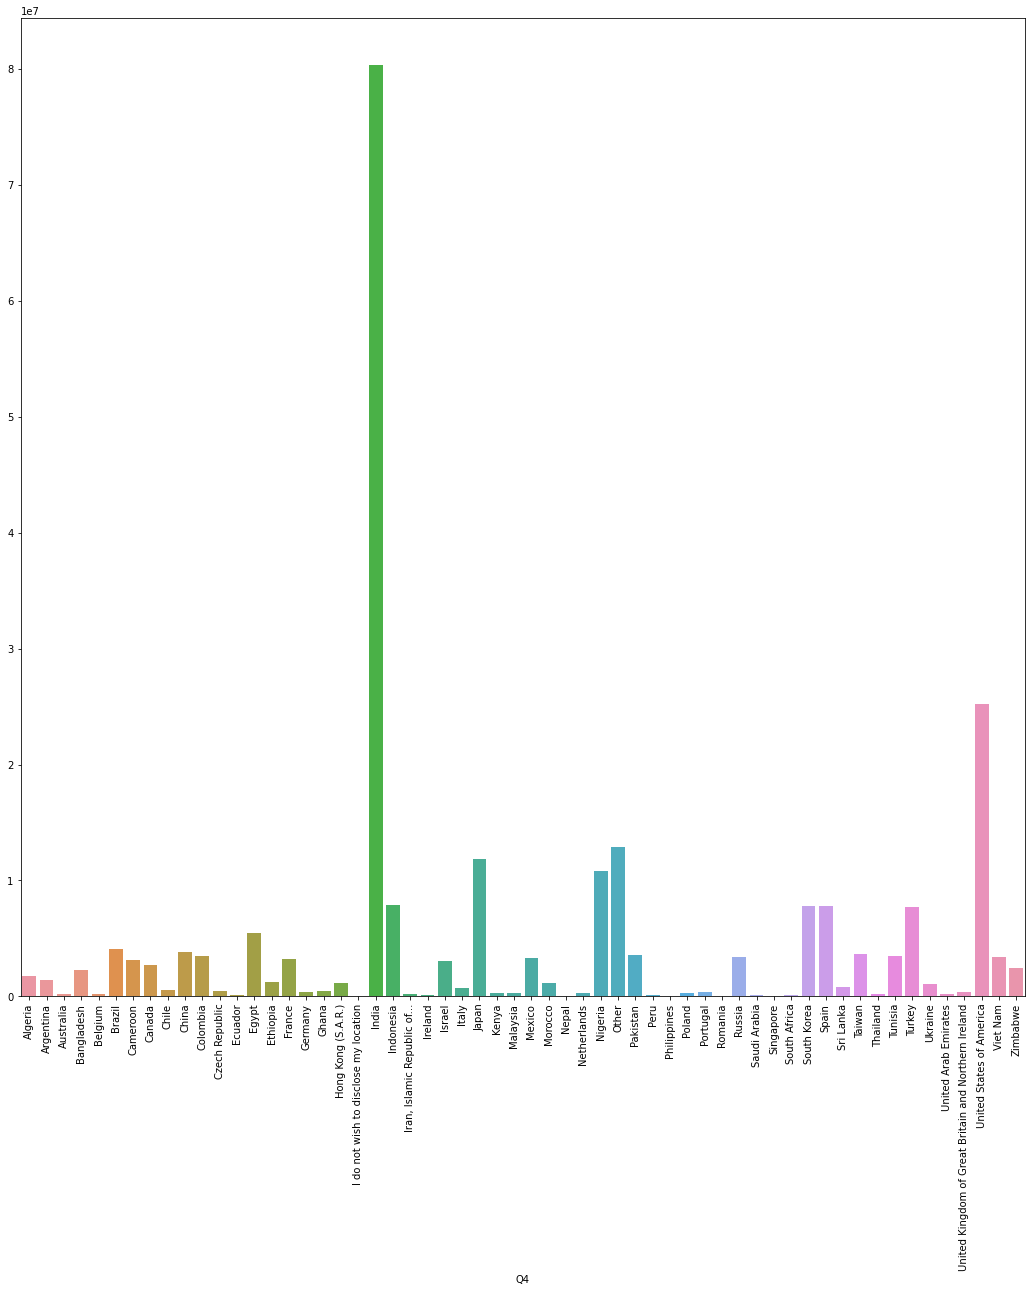

In [12]:
sum_duration_per_country = df_60.groupby('Q4')['Duration (in seconds)'].agg('sum')
plt.figure(figsize=(18,18))
sns.barplot(x = sum_duration_per_country.index, y = sum_duration_per_country.values)
plt.xticks(rotation=90)

as we see that India dominate amount of time studying which explain why the dominate compufield 

#### School vs Duration

In [13]:
df_60['Q5'].value_counts()

No     12036
Yes    11961
Name: Q5, dtype: int64

<AxesSubplot:xlabel='Q5'>

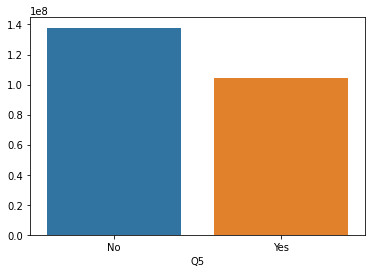

In [14]:
sum_duration_per_school = df_60.groupby('Q5')['Duration (in seconds)'].agg('sum')
sns.barplot(x = sum_duration_per_school.index, y = sum_duration_per_school.values)

#### which platforms have you begun or completed data science courses?

* Coursera
* Datacamp
* LinedIn
* Udemy
* Universtiy
* edx
* Kaggle


In [15]:
for i in df_60.columns:
    if i.startswith('Q6'):
        print(df_60[i].value_counts())

Coursera    9699
Name: Q6_1, dtype: int64
edX    2474
Name: Q6_2, dtype: int64
Kaggle Learn Courses    6628
Name: Q6_3, dtype: int64
DataCamp    3718
Name: Q6_4, dtype: int64
Fast.ai    944
Name: Q6_5, dtype: int64
Udacity    2199
Name: Q6_6, dtype: int64
Udemy    6116
Name: Q6_7, dtype: int64
LinkedIn Learning    2766
Name: Q6_8, dtype: int64
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)    1821
Name: Q6_9, dtype: int64
University Courses (resulting in a university degree)    6780
Name: Q6_10, dtype: int64
None    2643
Name: Q6_11, dtype: int64
Other    5669
Name: Q6_12, dtype: int64


[EVGENIA RAIKAKOU](https://www.kaggle.com/code/eraikako/data-science-and-ml-operationalization-wip)

In [16]:
def extract_and_count_all_the_multiple_choice_answers(question, df):
    
    # List of choices for Question, e.g. Q19 (computer vision methods)
    choices_list = [choice for choice in df.columns if choice.startswith(question)]
    dfs_list = []
    for col in choices_list:
        dfs_list.append(df.groupby([col]).agg({"Q2" : "count"}).reset_index().rename(columns={col: question, "Q2": "counts"}))

    agg_df = pd.concat(dfs_list)
    agg_df["relative_percent"] = agg_df.apply(lambda x : (x["counts"] / df.shape[0]), axis = 1)
    agg_df = agg_df.sort_values(by=["relative_percent"], ascending=True)
    
    return agg_df


def assign_label(service:str):
    if "google" in service.lower():
        return "Google"
    
    if "aws" in service.lower() or "amazon" in service.lower():
        return "Amazon"
    
    if "azure" in service.lower() or "microsoft" in service.lower():
        return "Microsoft"
  
    return "Other"

In [17]:
import plotly.express as px

product_questions = ["Q14", "Q31", "Q32", "Q33", "Q34", "Q35", "Q36","Q37", "Q38", "Q41"]

dfs_list = []
for product in product_questions:
    result = extract_and_count_all_the_multiple_choice_answers(product, data)
    result = result.rename(columns={product: "Service"})
    dfs_list.append(result)

products_df = pd.concat(dfs_list)


products_df["Label"] = products_df["Service"].apply(lambda x : assign_label(x))

products_df = products_df[products_df["Label"].isin(["Amazon", "Microsoft", "Google", "IBM"])]

df = px.data.tips()

fig = px.treemap(products_df, path=[px.Constant("AI Tech Stack"), 'Label', 'Service'], values='counts', color = 'relative_percent', color_continuous_scale = 'RdBu', height = 550)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

####  highest level of formal education

In [18]:
df_60['Q8'].value_counts()

Master’s degree                                                      9142
Bachelor’s degree                                                    7625
Doctoral degree                                                      2657
Some college/university study without earning a bachelor’s degree    1431
I prefer not to answer                                               1394
Professional doctorate                                                585
No formal education past high school                                  564
Name: Q8, dtype: int64

In [19]:
df_ed = df_60[
    (df_60["Q8"].notnull()) &
    (df_60["Q8"] != "I prefer not to answer")
]

In [20]:
education_df = df_ed["Q8"].value_counts().reset_index(name="counts").rename(columns={"index": "Education", "counts": "counts"})
education_df["custom_sort"] = [4, 3, 5, 2, 6, 1]
education_df = education_df.sort_values(by=["custom_sort"])
education_df['Percentage'] = round((education_df['counts'] / education_df['counts'].sum())*100,2)
education_df.head()

,Education,counts,custom_sort,Percentage
5,No formal education past high school,564,1,2.56
3,Some college/university study without earning ...,1431,2,6.50
1,Bachelor’s degree,7625,3,34.65
0,Master’s degree,9142,4,41.55
2,Doctoral degree,2657,5,12.08


In [21]:
fig = px.bar(
    education_df, 
    y='counts', 
    x='Education',
    text_auto=False,
    text= education_df['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
    title="Education Distribution"
)
fig.show()

In [22]:
df_60['Q11'].value_counts()

1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537
Name: Q11, dtype: int64

In [23]:
data.shape

(23998, 296)

### What's the State of Machine Learning Adoption in the Enterprise ?

In [26]:
scope_df = data[(data['Q5'] == 'No') & (data['Q24'].notnull()) & (data['Q23'] != 'Currently not employed')]
scope_df.shape

(9094, 296)

In [27]:
ai_adoption_totals = scope_df["Q24"].value_counts().to_dict()

ai_adoption = scope_df.groupby(
    ["Q24", "ML_adoption"]
).agg({
    "Q2" : "count"
}).reset_index().rename(columns={
    "Q2": "counts"
})

ai_adoption["relative_percent"] = ai_adoption.apply(lambda x : x["counts"] / ai_adoption_totals[x["Q24"]], axis = 1)
ai_adoption = ai_adoption[ai_adoption["ML_adoption"]!= "Not Known"]


trace1 = go.Scatter(
    x=ai_adoption["Q24"], 
    y=ai_adoption["ML_adoption"].apply(lambda x : x.split(".")[-1]),
    mode='markers', 
    hovertemplate=
        "Industry: %{x}<br>" +
        "AI Adoption Stage: %{y}<br>" +
        "Percentage: %{marker.size:,}" +
        "<extra></extra>",
    marker=dict(
        color=ai_adoption['relative_percent'],
        size=ai_adoption['relative_percent']*100,
        showscale=True,
        colorbar=dict(title='Percent'),
        opacity=0.7,
        colorscale = 'RdBu_r'
        )
)

layout = go.Layout(width=900, height=850, plot_bgcolor="#fff", paper_bgcolor="#fff", showlegend = False, 
                   title = {'text' : "<span style='font-size:30px; font-family:Times New Roman'>The State of Machine Learning Adoption by Industry</span><br><br><sup>Questions Data: Industry (Q24) and ML Adoption Levels (Q27)</sup><br><sup>Size,Color: Percentage of Respondents</sup>", 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : '#7b6b59'})
fig = go.Figure(data = [trace1], layout = layout)
fig.update_xaxes(showline=False, linewidth=1, linecolor='#c9c4c3', gridcolor='#c9c4c3', tickfont=dict(size=14, family='Verdana', color='#7b6b59'), 
                 title="", title_font=dict(size=14, family='Verdana', color='#f57369'), showgrid=False, tickangle=325)
fig.update_yaxes(showline=False, linewidth=1, linecolor='#000', gridcolor='#fff', tickfont=dict(size=14, family='Verdana', color='#a43725'), 
                 title="", title_font=dict(size=14, family='Verdana', color='#f57369'), showgrid=False)

fig.show()

KeyError: 'ML_adoption'